# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Project_final/arxiv_half.csv')

In [ ]:
#df_small = df.sample(frac=0.2, random_state=42)

In [ ]:
#output_path = '/content/drive/MyDrive/Project_final/arxiv_0.2.csv'
#df_small.to_csv(output_path, index=False, encoding='utf-8')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/arxiv_0.2.csv')

In [ ]:
df.head()

,title,authors,subjects,html_url,full_text,source_page_url
0,Breaking Speaker Recognition with PaddingBack,"Zhe Ye,Diqun Yan,Li Dong,Kailai Shen",Cryptography and Security (cs.CR); Sound (cs.S...,https://arxiv.org/html/2308.04179v2,"\theta}(x_{i}),y_{i}), underitalic_θ start_ARG...",https://arxiv.org/list/cs/2023-08?skip=0&show=...
1,Infinite-Dimensional Diffusion Models,"Jakiw Pidstrigach,Youssef Marzouk,Sebastian Re...",Machine Learning (stat.ML); Machine Learning (...,https://arxiv.org/html/2302.10130v3,Infinite-Dimensional Diffusion Models \name Ja...,https://arxiv.org/list/cs/2023-02?skip=6000&sh...
2,Computational Argumentation-based Chatbots: a ...,"Federico Castagna,Nadin Kokciyan,Isabel Sassoo...",Artificial Intelligence (cs.AI),https://arxiv.org/html/2401.03454v1,"In recent years, cutting-edge technologies hav...",https://arxiv.org/list/cs/2024-01?skip=0&show=...
3,Optimal Control of Malware Propagation in IoT ...,"Mousa Tayseer Jafar,Lu-Xing Yang,Gang Li,Xiaof...",Cryptography and Security (cs.CR),https://arxiv.org/html/2401.11076v1,"prefix=Mousa Tayseer, orcid=0000-0002-0408-054...",https://arxiv.org/list/cs/2024-01?skip=4000&sh...
4,Reflected Schrödinger Bridge for Constrained G...,"Wei Deng,Yu Chen,Nicole Tianjiao Yang,Hengrong...",Machine Learning (stat.ML); Machine Learning (...,https://arxiv.org/html/2401.03228v1,"\mathrm{w}}_{t}+\mathrm{d}\mathbf{L}_{t},\qqua...",https://arxiv.org/list/cs/2024-01?skip=6000&sh...


In [ ]:
    del df
    import gc
    gc.collect() # Принудительная очистка мусора

355

In [ ]:
#далее идет часть с небольшой очисткой кода, при перезапуске его не активирую, сразу читаю сохраненный файл, но сам код не стала комментировать

In [ ]:
import re

In [ ]:
df = df.dropna(subset=['full_text'])
df = df[df['full_text'].apply(lambda x: isinstance(x, str))]

In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    text = re.sub(r"License:.*", "", text)
    text = re.sub(r"HTML conversions.*", "", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['full_text'] = df['full_text'].apply(clean_text)

In [ ]:
print(df['full_text'].head())

0    \theta}(x_{i}),y_{i}), underitalic_θ start_ARG...
1    Infinite-Dimensional Diffusion Models \name Ja...
2    In recent years, cutting-edge technologies hav...
3    prefix=Mousa Tayseer, orcid=0000-0002-0408-054...
4    \mathrm{w}}_{t}+\mathrm{d}\mathbf{L}_{t},\qqua...
Name: full_text, dtype: object


In [ ]:
#df.loc[3, 'full_text']

In [ ]:
#df.loc[4, 'full_text']

In [ ]:
len(df)

2801

In [ ]:
#перезаписала файл с уже очищенным датасетом
#output_path = '/content/drive/MyDrive/Project_final/arxiv_0.2.csv'
#df.to_csv(output_path, index=False, encoding='utf-8')

In [ ]:
df['subjects'].value_counts()

,count
subjects,
Computer Vision and Pattern Recognition (cs.CV),349
Computation and Language (cs.CL),130
Machine Learning (cs.LG),127
Robotics (cs.RO),79
Machine Learning (cs.LG); Artificial Intelligence (cs.AI),78
...,...
Mesoscale and Nanoscale Physics (cond-mat.mes-hall); Emerging Technologies (cs.ET),1
Tissues and Organs (q-bio.TO); Machine Learning (cs.LG),1
Systems and Control (eess.SY); Dynamical Systems (math.DS); Adaptation and Self-Organizing Systems (nlin.AO); Classical Physics (physics.class-ph),1


In [ ]:
df = df.groupby('subjects').filter(lambda x: len(x) > 50)

In [ ]:
df['subjects'] = df['subjects'].apply(lambda x: x.split(';')[0].strip())

In [ ]:
df['subjects'].value_counts()

,count
subjects,
Computer Vision and Pattern Recognition (cs.CV),404
Computation and Language (cs.CL),207
Machine Learning (cs.LG),205
Robotics (cs.RO),79
Numerical Analysis (math.NA),69


In [ ]:
subject_counts = df['subjects'].value_counts()

In [ ]:
min_samples_per_class = 50
frequent_subjects = subject_counts[subject_counts >= min_samples_per_class].index

In [ ]:
df = df[df['subjects'].isin(frequent_subjects)].copy()

# Prepare dataset for training and evaluation


In [ ]:
if 'Label' not in df.columns:
    df['label'] = df['subjects'].astype('category').cat.codes
else:
    df = df.rename(columns={"Label": "label"})

In [ ]:
categories = df['subjects'].astype('category').cat.categories.tolist()
num_labels = len(categories)
id2label = {i: label for i, label in enumerate(categories)}

In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split

In [ ]:
ds = Dataset.from_pandas(df[['full_text', 'label', 'subjects']])
ds = ds.train_test_split(test_size=0.1, seed=42)

In [ ]:
# @title Load model
import torch
from transformers import AutoTokenizer, BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertForSequenceClassification.from_pretrained(
    "google-bert/bert-base-uncased", num_labels=num_labels, problem_type="single_label_classification"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: google-bert/bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [ ]:
def preprocess_function(examples):
    column_name = "full_text"
    texts = [str(t) if t is not None else "" for t in examples[column_name]]
    return tokenizer(
        texts,
        truncation=True,
        max_length=256,
        padding=False
    )

In [ ]:
from transformers import DataCollatorWithPadding

In [ ]:
tokenized_ds = ds.map(preprocess_function, batched=True)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

Map:   0%|          | 0/867 [00:00<?, ? examples/s]

Map:   0%|          | 0/97 [00:00<?, ? examples/s]

# Custom Trainer --- Contrastive Loss

In [ ]:
import torch.nn.functional as F
from transformers import TrainingArguments, Trainer

In [ ]:
class ContrastiveTrainer(Trainer):
    def __init__(self, *args, contrastive_alpha=0.01, temperature=0.1, **kwargs):
        super().__init__(*args, **kwargs)
        self.contrastive_alpha = contrastive_alpha
        self.temperature = temperature

    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")

        outputs = model(**inputs, output_hidden_states=True)
        logits = outputs.get("logits")

        loss_fct = torch.nn.CrossEntropyLoss()
        classification_loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        embeddings = outputs.hidden_states[-1][:, 0, :]

        embeddings = F.normalize(embeddings, p=2, dim=1)

        similarity_matrix = torch.matmul(embeddings, embeddings.T) / self.temperature

        labels = labels.view(-1, 1)
        mask = torch.eq(labels, labels.T).float().to(self.args.device)

        mask = mask - torch.eye(mask.shape[0]).to(self.args.device)

        exp_sim = torch.exp(similarity_matrix) * (1 - torch.eye(mask.shape[0]).to(self.args.device))
        log_prob = similarity_matrix - torch.log(exp_sim.sum(dim=1, keepdim=True) + 1e-5)

        mean_log_prob_pos = (mask * log_prob).sum(dim=1) / (mask.sum(dim=1) + 1e-5)
        contrastive_loss = -mean_log_prob_pos.mean()

        total_loss = classification_loss + (self.contrastive_alpha * contrastive_loss)

        return (total_loss, outputs) if return_outputs else total_loss

# LoRA

In [ ]:
!pip install -q peft transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from peft import LoraConfig, get_peft_model, TaskType

In [ ]:
peft_config = LoraConfig(
    task_type=TaskType.SEQ_CLS,
    r=16, lora_alpha=16, lora_dropout=0.1,
    target_modules=["query", "value"]
)
model = get_peft_model(model, peft_config)

/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:72: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:285: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


# Training arguments

In [ ]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

In [ ]:
training_args = TrainingArguments(
    output_dir="./bert-contrastive-lora",
    learning_rate=2e-4,
    per_device_train_batch_size=64,
    num_train_epochs=15,
    eval_strategy="epoch",
    save_strategy="epoch",
    fp16=False,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Train

In [ ]:
trainer = ContrastiveTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    data_collator=data_collator,
    contrastive_alpha=0.05,
    temperature=0.07,
    callbacks=[EarlyStoppingCallback(
        early_stopping_patience=3,
        early_stopping_threshold=0.001
    )]
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,1.068810
2,No log,0.962356
3,No log,0.939284
4,No log,0.880717
5,No log,0.850470
6,No log,0.846411
7,No log,0.812491
8,No log,0.816339
9,No log,0.772683
10,No log,0.788495


TrainOutput(global_step=168, training_loss=0.9218007950555711, metrics={'train_runtime': 115.3814, 'train_samples_per_second': 112.713, 'train_steps_per_second': 1.82, 'total_flos': 1398627534311424.0, 'train_loss': 0.9218007950555711, 'epoch': 12.0})

# Evaluation

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
def collate_fn(batch):
    return {
        'input_ids': torch.tensor([item['input_ids'] for item in batch]),
        'attention_mask': torch.tensor([item['attention_mask'] for item in batch]),
        'labels': torch.tensor([item['label'] for item in batch])
    }

def plot_results(model, dataset, title="BERT Contrastive"):
    model.eval()
    predictions, references = [], []


    full_label_names = df['subjects'].astype('category').cat.categories.tolist()

    test_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=16,
        collate_fn=collate_fn
    )

    for batch in tqdm(test_loader, desc=f"Оценка {title}"):
        inputs = {k: v.to("cuda") for k, v in batch.items() if k != 'labels'}
        labels = batch['labels'].to("cuda")

        with torch.no_grad():
            logits = model(**inputs).logits
            predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
            references.extend(labels.cpu().numpy())

    if not references or not predictions:
        print("Ошибка: Списки предсказаний или реальных меток пусты. Нечего оценивать.")
        return

    present_labels = np.unique(np.concatenate([references, predictions]))

    valid_present_labels = [lbl for lbl in present_labels if lbl < len(full_label_names)]

    if not valid_present_labels:
        print("Ошибка: Нет допустимых меток для оценки.")
        return

    present_names = [full_label_names[i] for i in valid_present_labels]

    print(f"n--- Отчет для {title} ---")
    print(classification_report(
        references,
        predictions,
        labels=valid_present_labels,
        target_names=present_names,
        zero_division=0
    ))

    cm = confusion_matrix(references, predictions, labels=valid_present_labels)

    plt.figure(figsize=(15, 12))
    show_labels = True if len(valid_present_labels) < 50 else False

    sns.heatmap(
        cm,
        annot=False,
        fmt='d',
        cmap='Purples',
        xticklabels=present_names if show_labels else False,
        yticklabels=present_names if show_labels else False
    )

    plt.title(f'Confusion Matrix: {title}n(Отображено классов: {len(valid_present_labels)})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

Оценка BERT + LoRA + Contrastive: 100%|██████████| 7/7 [00:00<00:00, 14.36it/s]


n--- Отчет для BERT + LoRA + Contrastive ---
                                                 precision    recall  f1-score   support

               Computation and Language (cs.CL)       0.88      0.82      0.85        28
Computer Vision and Pattern Recognition (cs.CV)       0.79      0.90      0.84        41
                       Machine Learning (cs.LG)       0.60      0.60      0.60        20
                   Numerical Analysis (math.NA)       1.00      1.00      1.00         4
                               Robotics (cs.RO)       0.00      0.00      0.00         4

                                       accuracy                           0.78        97
                                      macro avg       0.65      0.66      0.66        97
                                   weighted avg       0.75      0.78      0.77        97



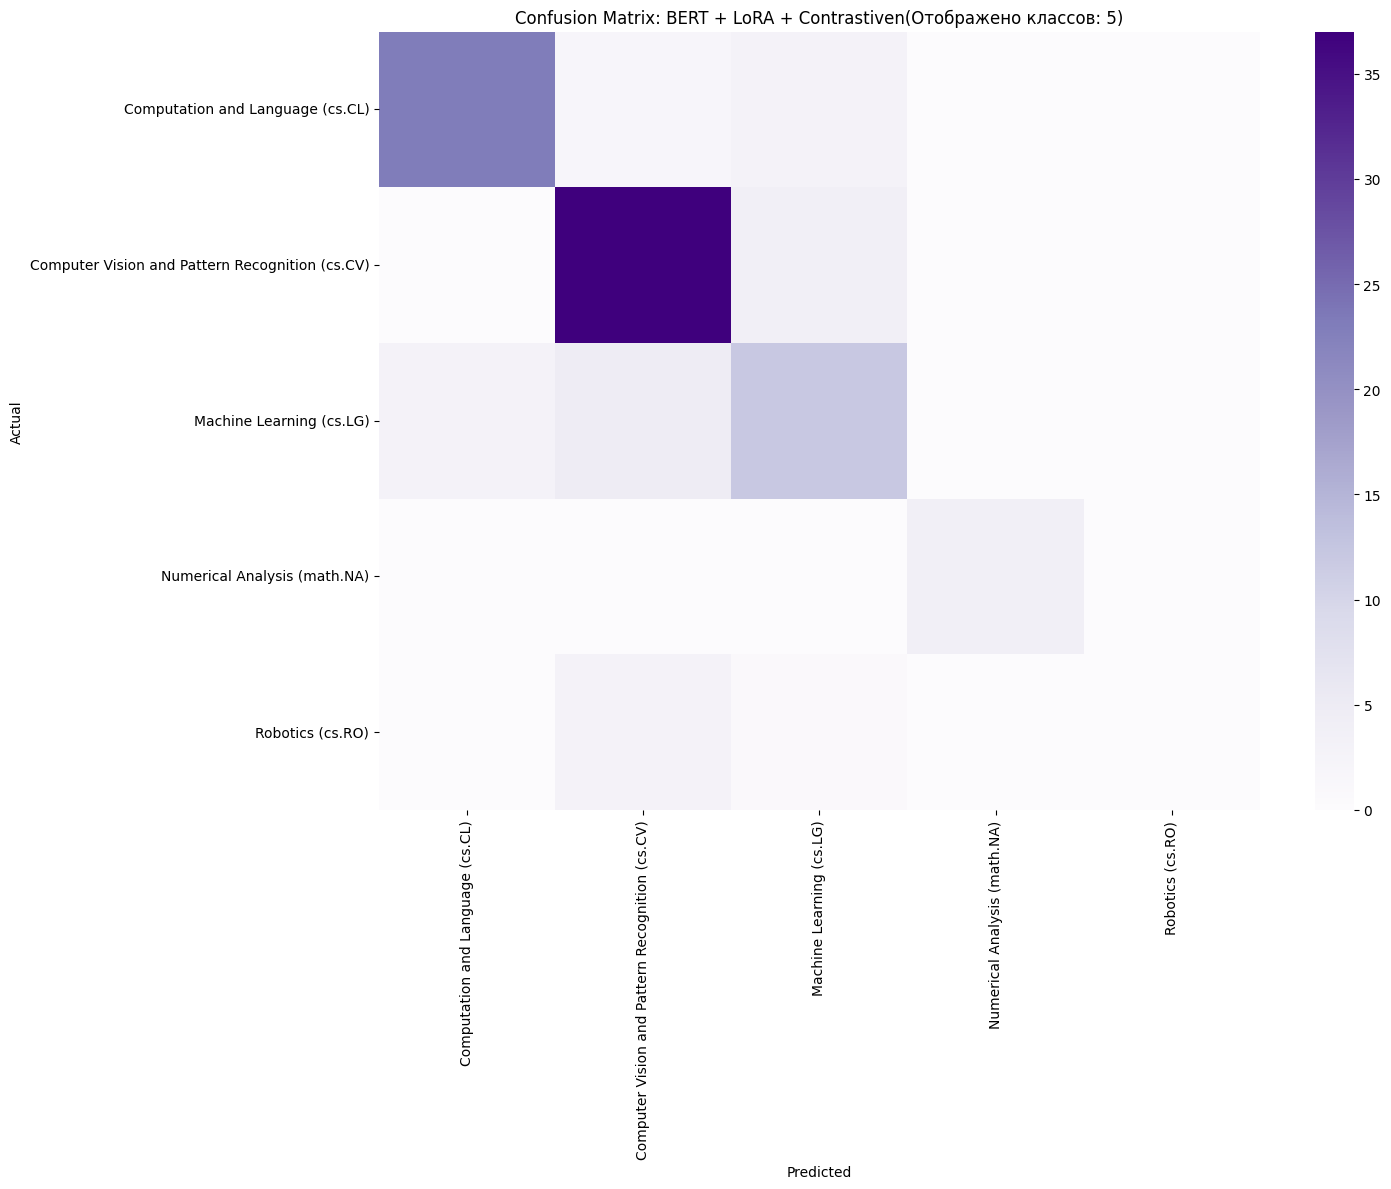

In [ ]:
plot_results(model, tokenized_ds["test"], title="BERT + LoRA + Contrastive")

In [ ]:
import os

# Saving model

Смотерела разные варианты сохранений

In [ ]:
#from huggingface_hub import notebook_login

#account = <your-hf-account-name>
#peft_model_id = f"{account}/bloomz-560-m-peft-method"
#model.push_to_hub(peft_model_id)

In [ ]:
#import shutil

In [ ]:
#shutil.copytree("./bert_contrastive_model", "/content/drive/MyDrive/my_bert_model")

In [ ]:
import json

In [ ]:
#save_directory = "./bert_contrastive_model"

In [ ]:
save_directory = "/content/drive/MyDrive/my_bert_model"

if not os.path.exists(save_directory):
    os.makedirs(save_directory)

model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

categories = df['subjects'].astype('category').cat.categories
id2label = {i: label for i, label in enumerate(categories)}
label2id = {label: i for i, label in enumerate(categories)}

with open(os.path.join(save_directory, "label_config.json"), "w") as f:
    json.dump({"id2label": id2label, "label2id": label2id}, f)

# Inference

In [ ]:
from peft import PeftModel, PeftConfig

In [ ]:
def load_model_for_inference(model_path):
    with open(f"{model_path}/label_config.json", "r") as f:
        config_data = json.load(f)
        id2label = config_data["id2label"]

    config = PeftConfig.from_pretrained(model_path)
    base_model = BertForSequenceClassification.from_pretrained(
        config.base_model_name_or_path,
        num_labels=len(id2label)
    )

    model = PeftModel.from_pretrained(base_model, model_path)
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    model.to("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    return model, tokenizer, id2label


model_path = "/content/drive/MyDrive/my_bert_model"
inf_model, inf_tokenizer, id_map = load_model_for_inference(model_path)

def predict_category(text):
    inputs = inf_tokenizer(text, return_tensors="pt", truncation=True, max_length=256).to(inf_model.device)

    with torch.no_grad():
        logits = inf_model(**inputs).logits
        prediction = torch.argmax(logits, dim=-1).item()

    return id_map[str(prediction)]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: google-bert/bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


In [ ]:
new_paper = "Recent advancements in large language models (LLMs) have prompted interest in deploying these models on mobile devices to enable new applications without relying on cloud connectivity. However, the efficiency constraints of deploying LLMs on resource-limited devices present significant challenges. In this paper, we conduct a comprehensive measurement study to evaluate the efficiency tradeoffs between mobile-based, edge-based, and cloud-based deployments for LLM applications." #поменять текст
print(f"Предсказанная категория: {predict_category(new_paper)}")

Предсказанная категория: Computer Vision and Pattern Recognition (cs.CV)
